In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("Bank-Customer-Attrition-Insights-Data.csv")

In [2]:
df.shape

(10000, 18)

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
# Checking for null values
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [5]:
# Checking the target balance 
df['Exited'].value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

In [6]:
df['Exited'].value_counts(normalize=True)

Exited
0    0.7962
1    0.2038
Name: proportion, dtype: float64

In [7]:
df['Point Earned'].max()

1000

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


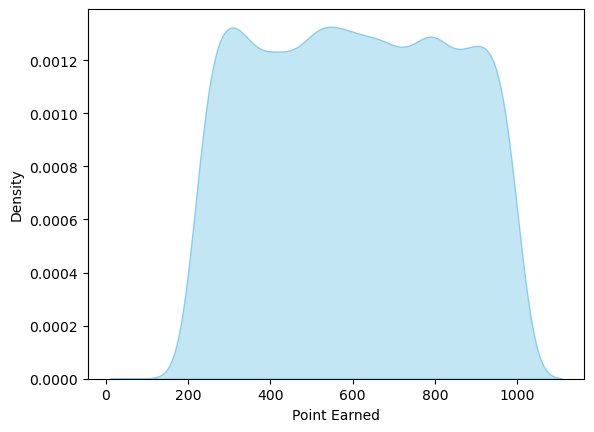

In [9]:
sns.kdeplot(df['Point Earned'], fill=True, color='skyblue', alpha=0.5)
plt.show()

In [10]:
"""
<= 350 - less Engaged
> 350 <= 700 - Engaged
> 700 - High Engaged

"""

def categorizing_points_earned(points):
    if points <= 350:
        return 'less_engaged'
    elif points > 350 and points <= 700:
        return 'engaged'
    else:
        return 'high_engaged'


df['Points Earned'] = df['Point Earned'].apply(categorizing_points_earned)

In [11]:
df['Points Earned'].value_counts()

Points Earned
engaged         4451
high_engaged    3780
less_engaged    1769
Name: count, dtype: int64

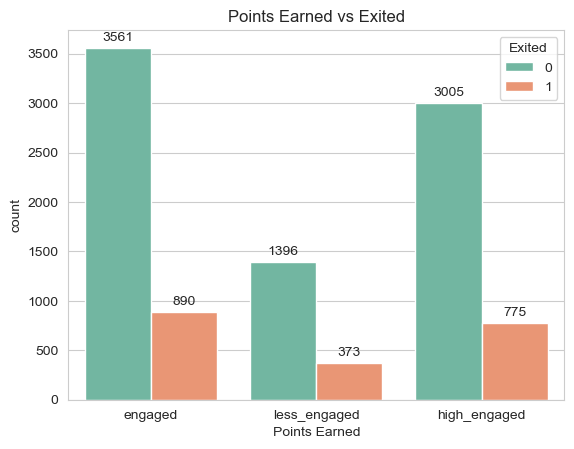

In [12]:
sns.set_style('whitegrid')
ax = sns.countplot(x='Points Earned', hue='Exited', data=df, palette='Set2')
for cont in ax.containers:
    ax.bar_label(cont, label_type='edge', padding=3)
plt.title('Points Earned vs Exited')
plt.show()

#### Observation 
This is interesting, customers who are engaged with the bank products choose to exit than less engaged customers.

In [13]:
df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [14]:
"""
<= 550 - Bad
> 550 and <= 650 - Good
> 650 - Very Good

"""

def categorizing_credit_score(score):

    if score <= 550:
        return 'bad'
    elif score > 550 and score <= 650:
        return 'good'
    else:
        return 'very_good'

df['CreditScore'] = df['CreditScore'].apply(categorizing_credit_score)

In [15]:
df['CreditScore'].value_counts()

CreditScore
very_good    5063
good         3316
bad          1621
Name: count, dtype: int64

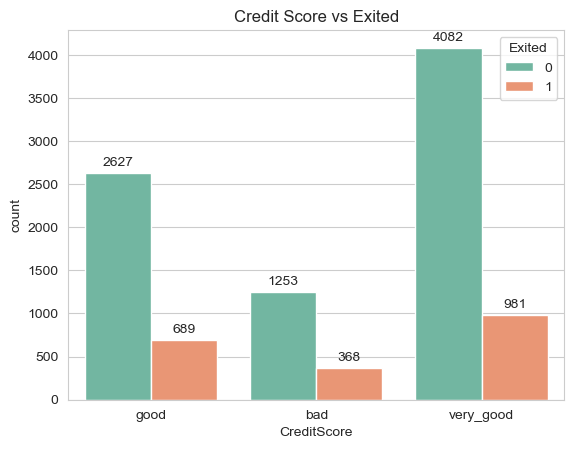

In [16]:
sns.set_style("whitegrid")
ax = sns.countplot(x='CreditScore', hue='Exited', data=df, palette='Set2')
for cont in ax.containers:
    ax.bar_label(cont, label_type='edge', padding=3)

plt.title('Credit Score vs Exited')
plt.show()

##### Observation
Customers who have strong credit score tend to churn.

C:\Users\rajku\AppData\Local\Temp\ipykernel_10540\514779551.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=exit_percentage.index, y=exit_percentage.values, palette='Blues_d')


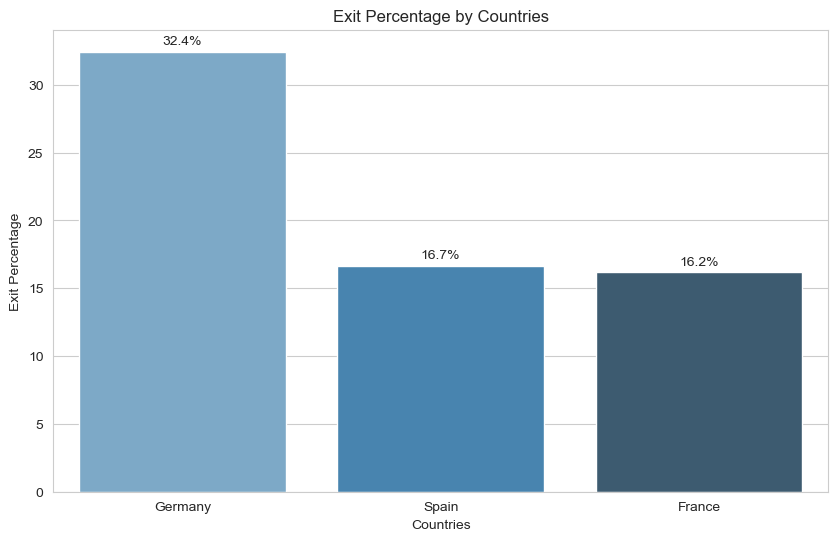

In [17]:
exit_percentage = df.groupby('Geography')['Exited'].mean() * 100
exit_percentage = exit_percentage.sort_values(ascending=False)

plt.figure(figsize=(10,6))
ax = sns.barplot(x=exit_percentage.index, y=exit_percentage.values, palette='Blues_d')
# Adding percentage labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, labels=[f'{yval:.1f}%' for yval in container.datavalues], label_type='edge', padding=3)

plt.title('Exit Percentage by Countries')
plt.xlabel('Countries')
plt.ylabel('Exit Percentage')
plt.show()

#### Observation
Out of the exited customers, 32.4% are from Germany, while 16% are from Spain and France 

C:\Users\rajku\AppData\Local\Temp\ipykernel_10540\1766568831.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=card_exit_percentage.index, y=card_exit_percentage.values, palette='Blues_d')


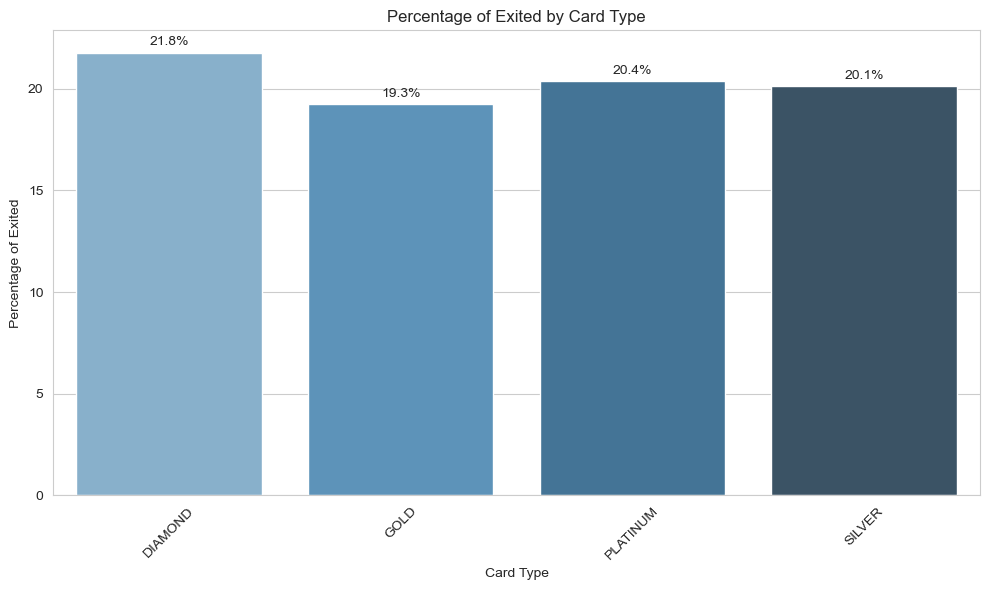

In [18]:
card_exit_percentage = df.groupby('Card Type')['Exited'].mean() * 100

# Plotting the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=card_exit_percentage.index, y=card_exit_percentage.values, palette='Blues_d')
for container in ax.containers:
    ax.bar_label(container, labels=[f'{yval:.1f}%' for yval in container.datavalues], label_type='edge', padding=3)

plt.title('Percentage of Exited by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Percentage of Exited')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Observation
Card Type feature doesn't have any relation with churned customers

In [19]:
exit_percentage = df.groupby('Geography')['Exited'].mean() * 100
exit_percentage = exit_percentage.sort_values(ascending=False)

plt.figure(figsize=(10,6))
ax = sns.barplot(x=exit_percentage.index, y=exit_percentage.values, palette='Blues_d')
# Adding percentage labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, labels=[f'{yval:.1f}%' for yval in container.datavalues], label_type='edge', padding=3)

plt.title('Exit Percentage by Countries')
plt.xlabel('Countries')
plt.ylabel('Exit Percentage')
plt.show()

Card Type
DIAMOND     2507
GOLD        2502
PLATINUM    2495
SILVER      2496
dtype: int64

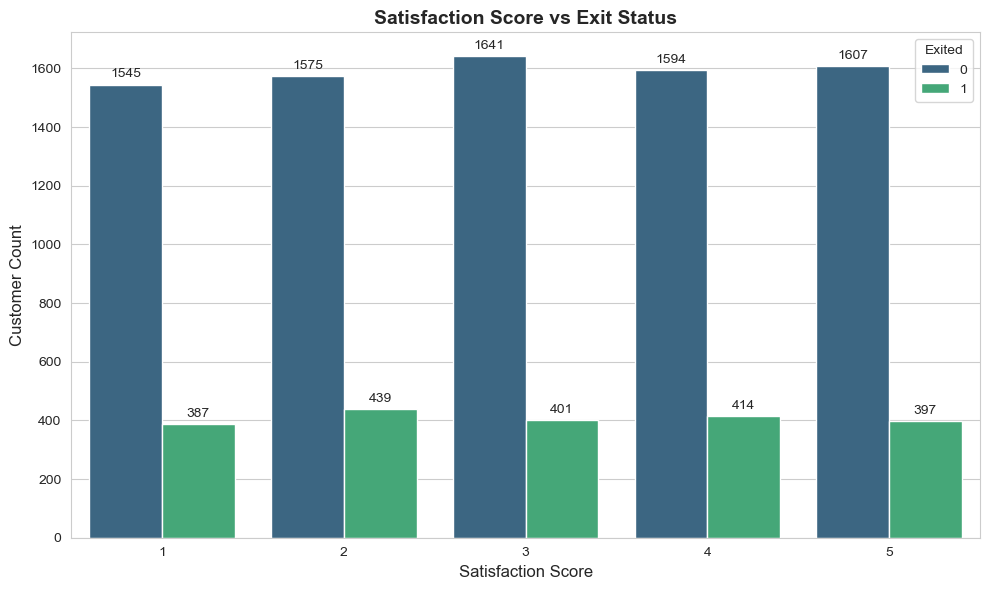

In [ ]:

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Satisfaction Score', hue='Exited', data=df, palette='viridis')


for cont in ax.containers:
    ax.bar_label(cont, label_type='edge', padding=3)

plt.title('Satisfaction Score vs Exit Status', fontsize=14, weight='bold')
plt.xlabel('Satisfaction Score', fontsize=12)
plt.ylabel('Customer Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

In [27]:
exited = df[df['Exited']==1]

In [30]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

<Figure size 800x600 with 0 Axes>

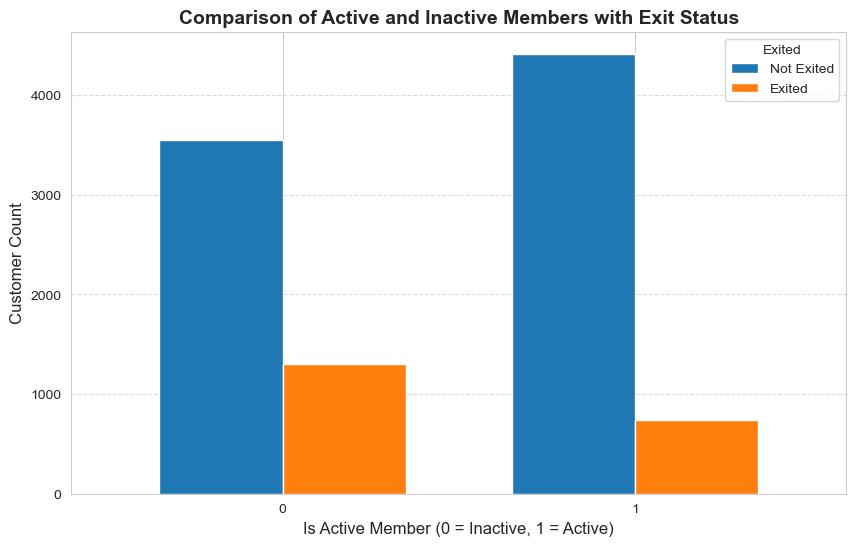

In [31]:
active_exited = df.groupby(['IsActiveMember', 'Exited']).size().unstack()
plt.figure(figsize=(8,6))
active_exited.plot(kind='bar', stacked=False, color=['#1f77b4', '#ff7f0e'], figsize=(10, 6), width=0.7)

plt.title('Comparison of Active and Inactive Members with Exit Status', fontsize=14, weight='bold')
plt.xlabel('Is Active Member (0 = Inactive, 1 = Active)', fontsize=12)
plt.ylabel('Customer Count', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(['Not Exited', 'Exited'], title='Exited', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


#### Observation
Active Customers are less likely to churn

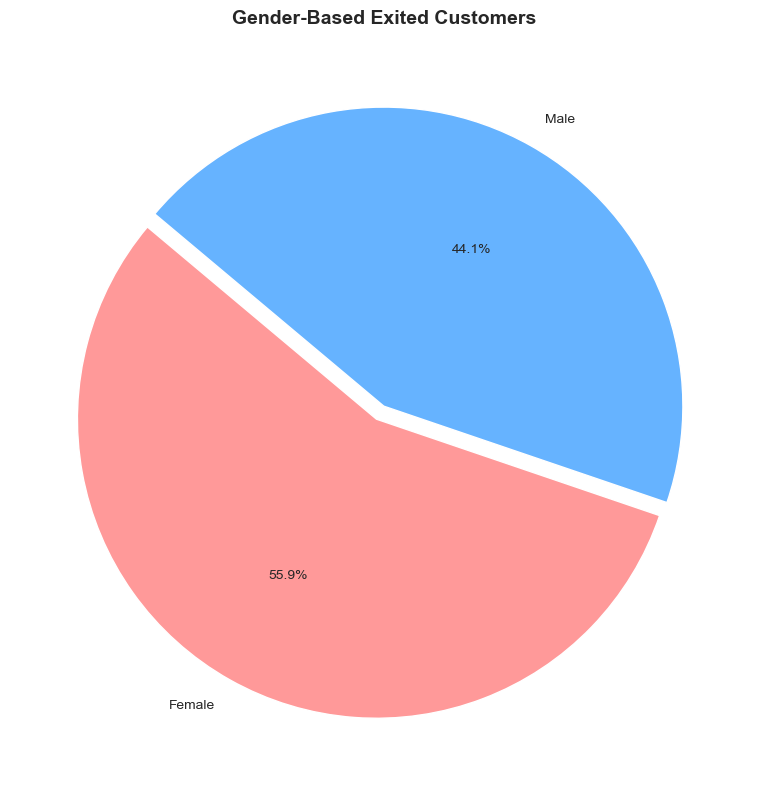

In [32]:
exited_customers = df[df['Exited']==1]

gender_exit_counts = exited_customers['Gender'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(
    gender_exit_counts.values,
    labels=gender_exit_counts.index,
    autopct='%1.1f%%', 
    startangle=140, 
    colors=['#ff9999', '#66b3ff'],
    explode=[0.05, 0]

)
plt.title('Gender-Based Exited Customers', fontsize=14, weight='bold')

# Show plot
plt.tight_layout()
plt.show()

#### Observation
Out of the exited customers, female preferred to leave the bank

#### Observation
Satisfication Score doesn't impact on churn customers

In [22]:
df['Satisfaction Score'].value_counts()

Satisfaction Score
3    2042
2    2014
4    2008
5    2004
1    1932
Name: count, dtype: int64

# Questions

- Exit vs satisfaction
- Exit vs Complain
- Exit vs Balance
- Exit vs Salary (Can answer whether a useful customer lost)
- 
